1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


eigenvalues: [2.54913514e+01 1.59608967e-16 2.01759743e+00]

percentage of variability in PCs: 100.0


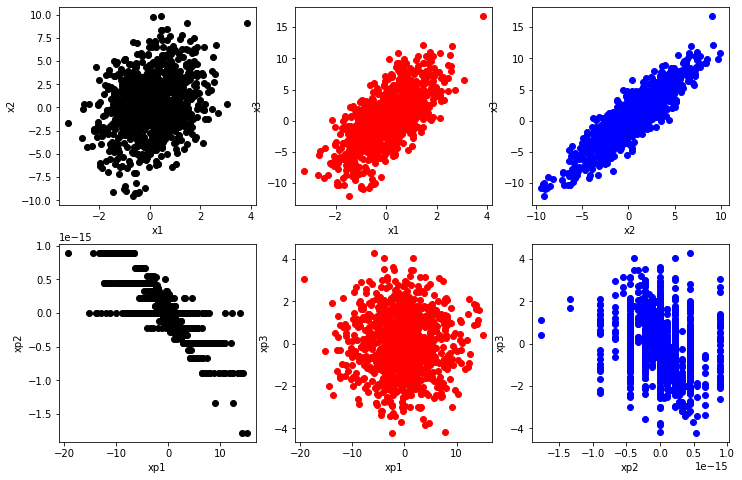

COV MATRIX OF ROTATED DATA: [[ 2.54913514e+01 -1.59151172e-15 -3.98746768e-15]
 [-1.59151172e-15  1.38386859e-31 -1.42939418e-16]
 [-3.98746768e-15 -1.42939418e-16  2.01759743e+00]]


In [15]:
%matplotlib inline
import numpy as np
from scipy import linalg as la
from numpy import random as rnd
import pandas as pd
from matplotlib import pyplot as plt

rnd.seed(42)
x1 = rnd.normal(loc = 0, scale = 1, size = 1000)
x2 = x1 + rnd.normal(loc = 0, scale = 3, size = 1000)
x3 = 2*x1 + x2

df = pd.DataFrame({'x1':x1, 'x2':x2, 'x3':x3})

C = np.cov(df.values.T)

l,V = la.eig(C)
l = np.real(l)

U,spectrum,Vt = la.svd(C)
#print(sorted(l) == sorted(spectrum)) The two procedures yield to slightly different results, actually

print('eigenvalues:', l) # the second eigenvector contains almost no information
print('\npercentage of variability in PCs:', (l[0]/l.sum() + l[2]/l.sum())*100)

Xp = np.dot(df.values,V)
dfp = pd.DataFrame(Xp, columns = ['xp1','xp2','xp3'])

fig, axs = plt.subplots(2,3, figsize = (12,8))

axs[0,0].set_xlabel('x1')
axs[0,0].set_ylabel('x2')

axs[0,1].set_xlabel('x1')
axs[0,1].set_ylabel('x3')

axs[0,2].set_xlabel('x2')
axs[0,2].set_ylabel('x3')

axs[1,0].set_xlabel('xp1')
axs[1,0].set_ylabel('xp2')

axs[1,1].set_xlabel('xp1')
axs[1,1].set_ylabel('xp3')

axs[1,2].set_xlabel('xp2')
axs[1,2].set_ylabel('xp3')

axs[0,0].scatter(df['x1'], df['x2'], c = 'black')
axs[0,1].scatter(df['x1'], df['x3'], c = 'red')
axs[0,2].scatter(df['x2'], df['x3'], c = 'blue')

axs[1,0].scatter(dfp['xp1'], dfp['xp2'], c = 'black')
axs[1,1].scatter(dfp['xp1'], dfp['xp3'], c = 'red')
axs[1,2].scatter(dfp['xp2'], dfp['xp3'], c = 'blue')

plt.show()

Cp = np.cov(Xp.T)
print('COV MATRIX OF ROTATED DATA:',Cp)#almost diagonal



2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [16]:
mu = np.zeros(10)
sigma = np.identity(10)/50 
n = 1000
noise =  np.random.multivariate_normal(mu, sigma, n).T

for i in range(10):
    df['noise{}' .format(i)] = noise[i]

C = np.cov(df.values.T)
#print(C.shape)

l,V = la.eig(C)
l = np.real(l)

U,spectrum,Vt = la.svd(C)
#print(sorted(l) == sorted(spectrum)) The two procedures yield to slightly different results, actually

print('eigenvalues:', l) # the second eigenvector contains almost no information
print('\npercentage of variability in PCs:', (l[0]/l.sum() + l[1]/l.sum())*100)

Xp = np.dot(df.values,V)
dfp = pd.DataFrame(Xp, columns = ['xp1', 'xp2', 'xp3', 'noisep0', 'noisep1', 'noisep2', 'noisep3', 'noisep4',\
                                 'noisep5', 'noisep6', 'noisep7', 'noisep8', 'noisep9'])
Cp = np.cov(Xp.T)
print('\nCovariance matrix of rotated data:')
print(pd.DataFrame(Cp))

eigenvalues: [ 2.54915597e+01  2.01784943e+00 -3.12491255e-16  2.41292086e-02
  2.22649672e-02  2.17240221e-02  1.69502547e-02  2.09054194e-02
  2.03797529e-02  1.97583126e-02  1.76562511e-02  1.87653263e-02
  1.86320718e-02]

percentage of variability in PCs: 99.27404758416726

Covariance matrix of rotated data:
              0             1             2             3             4   \
0   2.549156e+01 -1.806852e-14 -1.256719e-16 -4.978778e-17 -3.689630e-17   
1  -1.806852e-14  2.017849e+00  1.232482e-15 -5.473322e-18 -1.000201e-17   
2  -1.256719e-16  1.232482e-15  8.047533e-31  5.145178e-18  4.964253e-18   
3  -4.978778e-17 -5.473322e-18  5.145178e-18  2.412921e-02  2.500502e-17   
4  -3.689630e-17 -1.000201e-17  4.964253e-18  2.500502e-17  2.226497e-02   
5   8.001607e-17 -2.000402e-18  1.292756e-17 -4.200844e-17 -1.165234e-16   
6   5.334405e-17  8.890675e-19 -9.556662e-19  9.724176e-20 -1.678115e-17   
7   5.334405e-18 -9.668609e-18 -9.698215e-18  8.501708e-18  4.392896e-17   
8

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


DATA INSIDE DF:


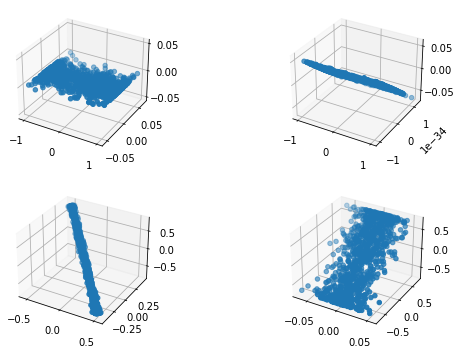

eigenvalues: [ 1.85431931e+00  1.51542375e-03 -1.99564018e-16  6.75965115e-17
  6.75965115e-17 -4.78657379e-17 -4.78657379e-17 -3.56480220e-17
 -2.75076420e-20  1.92687096e-27  3.30804126e-33  0.00000000e+00]

percentage of variability in PCs: 99.91834274218827


<function print>

In [14]:
#I use 3 cameras
from scipy.spatial.transform import Rotation as R

n = 4
t = np.linspace(0,1,1000)
x = np.sin(7*t)
y = rnd.normal(loc = 0, scale = 1/50, size = 1000)
z = np.zeros(1000)
df = pd.DataFrame({'x': x, 'y': y, 'z': z})

for i in range(1,n):
    r_teta = R.from_euler('x', 180/(i + 1) , degrees = True) #teta va da 0 a pi 
    r_phi = R.from_euler('z', 360/(i +1), degrees = True) #phi va da 0 a 2*pi
    r = r_teta * r_phi
    data_rot = r.apply(df.values[:,:3])
    df['r{0}x'.format(i)] = data_rot[:,0]
    df['r{0}y'.format(i)] = data_rot[:,1]
    df['r{0}z'.format(i)] = data_rot[:,2]

#checking that data are in someway rotated  
print('DATA INSIDE DF:')
fig = plt.figure(figsize=(9,6))
fig.tight_layout()

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter3D(df.x, df.y, df.z)

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter3D(df['r1x'], df['r1y'], df['r1z'])

ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter3D(df['r2x'], df['r2y'], df['r2z'])

ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter3D(df['r3x'], df['r3y'], df['r3z'])

plt.show()

C = np.cov(df.T)
l,V = la.eig(C)
l = np.real(l)
print('eigenvalues:',l)
print('\npercentage of variability in PCs:',l[0]*100/l.sum())
Xp = np.dot(df.values,V)
Cp = np.cov(Xp)
print

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

In [73]:
df = pd.read_csv('C:\\Users\Luca\data\magic04.data', names = ['flength','fWidth','fSize','fConc','fConc1',\
                                                              'fAsym','fM3Long',' fM3Trans','fAlpha',\
                                                              'fDist','class'])
df = df.drop(['class'], axis = 1)
C = np.cov(df.values.T)
#print(C)

l,V = la.eig(C)
l = np.real(l)
print('eigenvalues:', l) # the second eigenvector contains almost no information
print('\npercentage of variability in PCs:', (l[0]/l.sum() + l[1]/l.sum() + l[2]/l.sum() + l[3]/l.sum() +\
                                             l[4]/l.sum() + l[5]/l.sum() + l[6]/l.sum())*100)

Xp = np.dot(df.values,V)
Cp = np.cov(Xp.T)
print('\nCovariance matrix of rotated data:')
print(pd.DataFrame(Cp))

eigenvalues: [6.57979140e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187259e+02 4.33599171e+02 1.17330074e+02 8.63965822e-02
 1.07363851e-02 3.85322859e-04]

percentage of variability in PCs: 99.99934718055896

Covariance matrix of rotated data:
              0             1             2             3             4  \
0  6.579791e+03 -4.823349e-12  2.723272e-12 -5.049826e-14  1.230321e-12   
1 -4.823349e-12  3.853870e+03  3.498917e-12 -5.770000e-13 -7.593867e-13   
2  2.723272e-12  3.498917e-12  2.016383e+03  9.288619e-13  6.805788e-13   
3 -5.049826e-14 -5.770000e-13  9.288619e-13  1.326760e+03  4.681610e-13   
4  1.230321e-12 -7.593867e-13  6.805788e-13  4.681610e-13  6.101873e+02   
5 -5.355876e-14 -2.448400e-13 -5.528029e-14  3.003116e-14  6.015438e-13   
6 -1.124447e-12  7.071669e-13 -6.845957e-13  3.093018e-13 -3.020899e-15   
7 -1.674996e-13 -1.438988e-13  2.540455e-15 -1.746040e-13  5.611864e-14   
8 -2.931632e-13  7.666774e-13 -4.156034e-14 -5.895442e-14 -1.885641e-